4.5.1 离散线性回归

In [25]:
%matplotlib inline
import torch
from d2l import torch as d2l
from torch import nn


In [26]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1))  * 0.01, 0.05
train_data = d2l.synthetic_data(true_w,true_b, n_train)
train_iter = d2l.load_array(train_data , batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)


4.5.2 从零开始实现

In [27]:
#初始化模型参数
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w , b]

In [66]:
# L2范数惩罚
def l2_penalty(w):
    #   1/2 ||w||
    return torch.sum(w.pow(2)) /2

# L1范数惩罚
def l1_penalty(w):
    #   1/2 ||w||
    return torch.sum(torch.abs(w.pow(2))) /2

In [76]:
# 定义训练代码

def train_l1(lambd):
    w, b = init_params()
    num_epochs , lr= 100, 0.003
    net, loss = lambda X: d2l.linreg(X , w, b), d2l.squared_loss
    animator = d2l.Animator(xlabel='epcoh', ylabel='loss', 
                            yscale='log',xlim=[5, num_epochs], legend=['train', 'test'] )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l1_penalty(w)
            # l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b], lr, batch_size)
        if (epoch +1) % 5 == 0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
                                                               d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L1范数：', torch.norm(w).item())

def train_l2(lambd):
    w, b = init_params()
    num_epochs , lr= 100, 0.003
    net, loss = lambda X: d2l.linreg(X , w, b), d2l.squared_loss
    animator = d2l.Animator(xlabel='epcoh', ylabel='loss', 
                            yscale='log',xlim=[5, num_epochs], legend=['train', 'test'] )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            #l = loss(net(X), y) + lambd * l1_penalty(w)
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b], lr, batch_size)
        if (epoch +1) % 5 == 0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
                                                               d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', torch.norm(w).item())

w的L2范数： 13.698906898498535 2.7103379466097976e-06


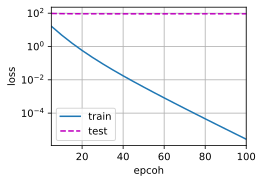

In [ ]:
# 忽略正则直接训练
train_l1(lambd= 0)

w的L2范数： 0.33223211765289307 0.00042161766905337574


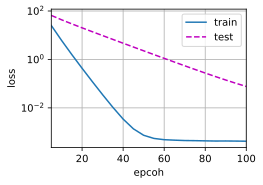

In [ ]:
# 使用正则
train_l1(lambd=3)

w的L2范数： 0.3942381739616394 0.0035137909464538096


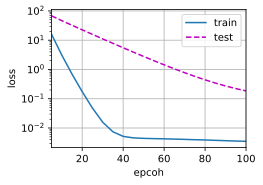

In [75]:
train_l2(lambd=3)

4.5.3 简洁实现

In [36]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([
        {'params' :net[0].weight , 'weight_decay':wd},
        {'params' : net[0].bias}],  lr=lr)
    
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', 
                            legend=['train_loss', 'test_loss'], xlim=[1,num_epochs], yscale='log')
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1)  % 5 ==0:
            animator.add(epoch +1 , (
                d2l.evaluate_loss(net,  train_iter, loss),
                d2l.evaluate_loss(net,  test_iter, loss))
            )
    print('L2范数：',net[0].weight.norm().item())

L2范数： 12.705910682678223


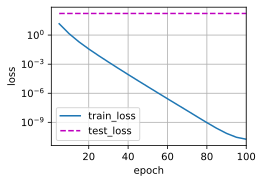

In [54]:
train_concise(0)

L2范数： 0.36966878175735474


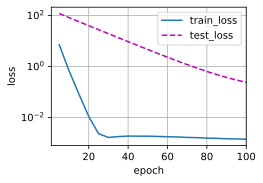

In [38]:
train_concise(3)

L2范数： 10.801778793334961


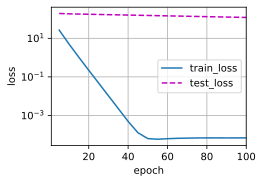

In [39]:
train_concise(0.2)

L2范数： 5.28659725189209


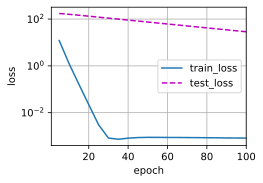

In [40]:
train_concise(0.8)

L2范数： 0.04170043393969536


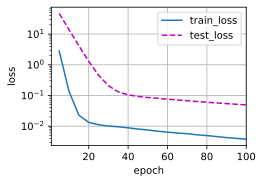

In [43]:
train_concise(10)

L2范数： 0.00942662637680769


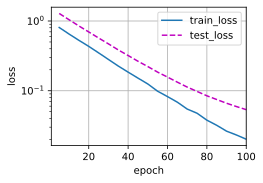

In [44]:
train_concise(100)

L2范数： 0.007167777977883816


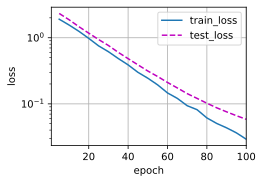

In [50]:
train_concise(300)

L2范数： 0.009073426946997643


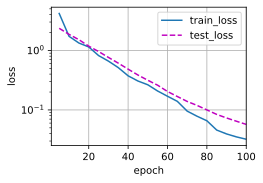

In [48]:
train_concise(600)

L2范数： inf


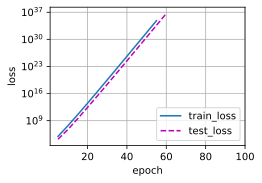

In [53]:
train_concise(700)